In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import re
import string
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [3]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/Data/Huy's_data.csv"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/Data/Huy's_data.csv"

In [4]:
df_train = pd.read_csv(train_path, encoding='utf-8')
df_test = pd.read_csv(test_path, encoding='utf-8')

In [5]:
# X_train = df_train.OriginalTweet
# X_test = df_test.OriginalTweet

# y_train = df_train.Sentiment
# y_test = df_test.Sentiment

df = df_train.append(df_test, ignore_index=False).drop(["Time", "Rating"], axis=1)
df.head()

<ipython-input-5-401799ab302e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test, ignore_index=False).drop(["Time", "Rating"], axis=1)


,Review Text,sentiment
0,Came here once to do endoscopy. Terrible servi...,Negative
1,Bệnh viện khá hiện đại. Vị trí thuận lợi đến v...,Neutral
2,"Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...",Positive
3,Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...,Positive
4,26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...,Positive


In [6]:
df['sentiment'].value_counts()

Positive    6044
Negative    5240
Neutral     1234
Name: sentiment, dtype: int64

In [7]:
df.tail()

,Review Text,sentiment
6254,Phai Chiu thoi vi qua nhieu nguoi bi benh nay...,Positive
6255,La chuyen da mo toi rat tin tuong nhung vi co ...,Positive
6256,Dog ng chan choi.ko co ai huog dan ca,Neutral
6257,Tôi bất khả dĩ mới chọn bệnh viện này để khám....,Negative
6258,"Tuyet voi, boc phieu kb ma gianh giat nhau nhu...",Negative


In [8]:
pos_data = df[df['sentiment']=='Positive']
neg_data = df[df['sentiment']=='Negative']
neu_data = df[df['sentiment']=='Neutral']

data = pd.concat([pos_data,neg_data,neu_data],axis=0,ignore_index=True)

data

,Review Text,sentiment
0,"Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...",Positive
1,Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...,Positive
2,26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...,Positive
3,"Bv sạch sẽ, dịch vụ tốt. Lưu ý đây là bv dịch ...",Positive
4,Bệnh viện này đông thật sự mọi người ạ. Đi khá...,Positive
...,...,...
12513,Bệnh viện này luôn luôn nằm trong tình trạng q...,Neutral
12514,Bệnh viện quá chật chội và đông đúc. Khám bệnh...,Neutral
12515,Tim hiểu sau,Neutral
12516,"Chau em bi noi 2 muc o 2 ben co, tinh trang va...",Neutral


In [9]:
data = data.sample(frac=1, axis=0).reset_index(drop=True)
data

,Review Text,sentiment
0,"Bác sĩ và nhân viên nhiệt tình, khu nhận bệnh ...",Positive
1,Sai địa chỉ,Negative
2,Mk thấy dv khám ổn nhưng chẩn bệnh ko 9 xác nh...,Neutral
3,"BV dơ bẩn thấy ớn, lụp xụp. Thức ăn thì dở, nơ...",Negative
4,"Bệnh viện làm thủ tục chậm, đợi rất lâu dù tro...",Negative
...,...,...
12513,bá sĩ siêu âm phòng 1 khu D làm việc thiếu chu...,Negative
12514,Hôm nay lần đầu tiên mình cho con khám ở bệnh ...,Negative
12515,Quá mất thời gian. Khám dinh dưỡng ko số thứ t...,Negative
12516,Mất khoảng 2 tiếng để khám thai định kỳ (ko xé...,Neutral


In [10]:
data.sentiment.value_counts()

Positive    6044
Negative    5240
Neutral     1234
Name: sentiment, dtype: int64

In [11]:
num_classes = 3
print(len(data['sentiment'].unique()))

3


In [12]:
class_names = ['Neutral','Positive','Negative']
print(data['sentiment'].unique())

['Positive' 'Negative' 'Neutral']


In [13]:
data['sentiment'] = data['sentiment'].replace({'Neutral':1, 'Positive':2, 'Negative':0})
data

,Review Text,sentiment
0,"Bác sĩ và nhân viên nhiệt tình, khu nhận bệnh ...",2
1,Sai địa chỉ,0
2,Mk thấy dv khám ổn nhưng chẩn bệnh ko 9 xác nh...,1
3,"BV dơ bẩn thấy ớn, lụp xụp. Thức ăn thì dở, nơ...",0
4,"Bệnh viện làm thủ tục chậm, đợi rất lâu dù tro...",0
...,...,...
12513,bá sĩ siêu âm phòng 1 khu D làm việc thiếu chu...,0
12514,Hôm nay lần đầu tiên mình cho con khám ở bệnh ...,0
12515,Quá mất thời gian. Khám dinh dưỡng ko số thứ t...,0
12516,Mất khoảng 2 tiếng để khám thai định kỳ (ko xé...,1


In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
stopwords_vn = [
    "bị", "bởi", "cả", "các", "cái", "cần", "càng", "chỉ", "chiếc", "cho", "chứ",
    "chưa", "chuyện", "có", "có_thể", "cứ", "của", "cùng", "cũng", "đã", "đang",
    "đây", "để", "đến_nỗi", "đều", "điều", "do", "đó", "được", "dưới", "gì", "khi",
    "không", "là", "lại", "lên", "lúc", "mà", "mỗi", "một_cách", "này", "nên", "nếu",
    "ngay", "nhiều", "như", "nhưng", "những", "nơi", "nữa", "phải", "qua", "ra", "rằng",
    "rằng", "rất", "rất", "rồi", "sau", "sẽ", "so", "sự", "tại", "theo", "thì", "trên",
    "trước", "từ", "từng", "và", "vẫn", "vào", "vậy", "vì", "việc", "với", "vừa"
    # Add more stopwords as needed
]

In [16]:
word_replacements = {
    # Group: Numbers and simple replacements
    "1": "i",
    "3": "e",
    "4": "a",
    "5": "s",
    "7": "t",
    "0": "o",
    "@": "a",
    "/\\": "a",
    "/-\\": "a",
    "*": "a",
    "ä": "a",
    "á": "a",
    "à": "a",
    "â": "a",
    "a^": "a",
    "ã": "a",
    "å": "a",
    "ą": "a",
    "ª": "a",
    "∀": "a",
    "∧": "a",
    "α": "a",

    # Group: Letters and their replacements
    "8": "b",
    "|3": "b",
    "13": "b",
    "ß": "b",
    "þ": "b",
    "v": "b",
    "ć": "c",
    "č": "c",
    "ç": "c",
    "©": "c",
    "σ": "c",
    "(": "c",
    "¢": "c",
    "<": "c",
    "[": "c",
    "©": "c",
    "[)": "d",
    "|>": "d",
    "|)": "d",
    "|]": "d",
    "3": "e",
    "€": "e",
    "є": "e",
    "[-": "e",
    "|=": "f",
    "ƒ": "f",
    "/=": "f",
    "6": "g",
    "(_+": "g",
    "#": "h",
    "/-/": "h",
    "[-]": "h",
    "]-[": "h",
    ")-(": "h",
    "(-)": "h",
    ":-:": "h",
    "|~|": "h",
    "|-|": "h",
    "]~[": "h",
    "}{" : "h",

    # Group: More letters and their replacements
    "1": "i",
    '!': "i",
    "|": "i",
    "][" : "i",
    "]": "i",
    ":" : "i",
    "_|": "j",
    "_/": "j",
    "¿": "j",
    "(/": "j",
    "ʝ": "j",
    ";": "j",
    "X": "k",
    "|<": "k",
    "|{": "k",
    "ɮ": "k",
    "£": "l",
    "1_": "l",
    "ℓ": "l",
    "|_": "l",
    "[_": "l",
    "|V|": "m",
    "|\\/|": "m",
    "/\\/\\": "m",
    "/V\\": "m",
    "|V": "n",
    "|\\|": "n",
    "/\\/": "n",
    "[\\]": "n",
    "/V": "n",

    # Group: More replacements
    "[]": "o",
    "0": "o",
    "()": "o",
    "°": "o",
    "|*": "p",
    "|o": "p",
    "|º": "p",
    "|°": "p",
    "/*": "p",
    "¶": "q",
    "(_,)": "q",
    "()_": "q",
    "0_": "q",
    "°|": "q",
    "<|": "q",
    "®": "r",
    "2": "r",
    "|?": "r",
    "/2": "r",
    "®": "r",
    "Я": "r",
    "|2": "r",
    "§": "s",
    "5": "s",
    "$": "s",
    "_/¯": "s",
    "7": "t",
    "†": "t",
    "¯|¯": "t",
    "(_)": "u",
    "|_|": "u",
    "L|": "u",
    "µ": "u",
    "\/": "v",
    "|/": "v",
    "\/\/": "w",
    "vv": "w",
    "\/": "w",
    "\^/": "w",
    "\V/": "w",
    "\|/": "w",
    "\_|_/": "w",
    "\_:_/": "w",
    "><": "x",
    "}{" : "x",
    "×": "x",
    ")(": "x",
    "`/": "y",
    "φ": "y",
    "¥": "y",
    "\/": "y",
    "≥": "z",
    "7_": "z",
    ">_": "z",
    
    # Group: Common abbreviations and their expansions
    "youre": "you are",
    "im": "I am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "I have",
    "id": "I would",
    "theyre": "they are",
    "theres": "there is",

    # Group: Common Vietnamese shortcuts and their expansions
    "ko": "không",
    "t": "tôi",
    "m": "mình",
    "mày": "em",
    "tao": "anh",
    "dc": "được",
    "hok": "không",
    "ngta": "người ta",
    'bsau': "bữa sau",
    "k": "không"
}

In [17]:
!pip install underthesea

In [18]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from underthesea import text_normalize
from underthesea import word_tokenize
from underthesea import classify
from underthesea import sentiment
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [19]:
stuff_to_be_removed = stopwords.words('english') + list(punctuation) + stopwords_vn
stemmer = LancasterStemmer()

In [20]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

def clean_text(data):

    # remove hashtags and @usernames
    data = re.sub(r'http\S+', '', data)
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", data)
    data = re.sub("(\\d|\\W)+", " ", data)
    data = re.sub(r'\d+', '', data)

    # Lowering Text
    data = data.lower()

    # Removing Stop-words
    # stopwords_dict = {word: 1 for word in stopwords.words("english")}
    data = " ".join([word for word in data.split() if word not in stuff_to_be_removed])
    data = [word_replacements.get(word, word) for word in data]
    # lemmatizing words
    #data = lemmatizer.lemmatize(data)
    # Joining the list of words into a single string
    data = ' '.join(data)
    # tokenization of sentences
    data = word_tokenize(data)

    return data

In [25]:
from sklearn.model_selection import train_test_split

X = data['Review Text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
import nltk
nltk.download('punkt')
texts = [' '.join(clean_text(text)) for text in data['Review Text']]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
import nltk
nltk.download('punkt')

# Assuming you have defined the clean_text function

# Fill missing values in df["ReviewText"] with empty strings
df["Review Text"].fillna("", inplace=True)

# Apply clean_text function to text data
texts = [' '.join(clean_text(text)) for text in df["Review Text"]]

# Similarly, handle missing values in X_train and X_test if needed
X_train.fillna("", inplace=True)
X_test.fillna("", inplace=True)

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# preparing input to our model
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 25


In [29]:
print(len(texts_train))
print(len(texts_test))

10014
2504


In [30]:
print(texts[0])
print(len(texts[0])) # this is number of characters NOT IMP

c a mình e e n d o s c o p y tôi e r r i b l e s e r b i c e f a c i l i tôi i e s p r o p e r q u e i n g mình a n y p e o p l e tôi o o không q u e i n g tôi i c không e tôi s a d b a n c e s e l l i n g p a tôi i e n tôi s h i g h e r p r i c e u n e tôi h i c a l s tôi a f f s h o s p i tôi a l không n o w n o tôi h i n g p r o b l e mình g o i n g y e a r s s a w mình a n y s tôi a f f s s tôi o o d p l a y e d p h o n e s i n c e mình a n y p a tôi i e n tôi s s tôi a f f s n u r s e s d o c tôi o r s s p e n d s h o r tôi tôi i mình e p a tôi i e n tôi w h o l e p r o c e s s tôi o o không tôi w o d a y s s a w d o c tôi o r s mình i n u tôi e s mình i n s e n d o s c o p y d o c tôi o r s q u a l i tôi y o không n o tôi h i n g g o o d h o s p i tôi a l p r i b a tôi e h o s p i tôi a l s c i tôi y mình u c h b e tôi tôi e r o n e c h c h b o n c h e n không h n g p l tôi h c n g n h không h n g h o n n không h n g c không h n i x p h n g r n h i u c n h n l tôi h tôi r c r b n

In [31]:
lst = []

for i in texts:
  lst.append(len(i.split()))
val = max(lst)                             # Number of Words IMP
val

1659

In [32]:
# Max input length (max number of words)
max_seq_len = val+3

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len)
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[ 0,  0,  0, ..., 13,  9,  2],
       [ 0,  0,  0, ..., 10,  3,  2],
       [ 0,  0,  0, ...,  1,  2, 11],
       ...,
       [ 0,  0,  0, ...,  3,  2,  8],
       [ 0,  0,  0, ...,  1,  6,  2],
       [ 0,  0,  0, ...,  1,  5,  1]], dtype=int32)

In [33]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [35]:
print(len(y_train))
print(len(y_test))

10014
2504


# GRU

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, GRU
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_features=128
max_seq_len = val+3

# embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_seq_len))
model.add(Dropout(0.5))

model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(32,return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(10))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1662, 128)         3328      
                                                                 
 dropout (Dropout)           (None, 1662, 128)         0         
                                                                 
 gru (GRU)                   (None, 1662, 64)          37248     
                                                                 
 dropout_1 (Dropout)         (None, 1662, 64)          0         
                                                                 
 gru_1 (GRU)                 (None, 1662, 32)          9408      
                                                                 
 dropout_2 (Dropout)         (None, 1662, 32)          0         
                                                                 
 gru_2 (GRU)                 (None, 10)                1

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

history_gru = model.fit(X_train_pad, y_train,epochs=50,batch_size=32,validation_data=(X_test_pad, y_test),callbacks=[early_stop])

Epoch 1/50
313/313 [==============================] - 51s 141ms/step - loss: 0.9374 - accuracy: 0.5456 - val_loss: 0.8372 - val_accuracy: 0.6434
Epoch 2/50
313/313 [==============================] - 43s 138ms/step - loss: 0.8853 - accuracy: 0.6147 - val_loss: 0.8149 - val_accuracy: 0.6534
Epoch 3/50
313/313 [==============================] - 42s 134ms/step - loss: 0.8663 - accuracy: 0.6353 - val_loss: 0.8010 - val_accuracy: 0.6677
Epoch 4/50
313/313 [==============================] - 42s 134ms/step - loss: 0.8674 - accuracy: 0.6297 - val_loss: 0.8109 - val_accuracy: 0.6629
Epoch 5/50
313/313 [==============================] - 41s 131ms/step - loss: 0.8505 - accuracy: 0.6438 - val_loss: 0.7845 - val_accuracy: 0.6757
Epoch 6/50
313/313 [==============================] - 41s 133ms/step - loss: 0.8324 - accuracy: 0.6553 - val_loss: 0.7771 - val_accuracy: 0.6849
Epoch 7/50
313/313 [==============================] - 42s 134ms/step - loss: 0.8290 - accuracy: 0.6587 - val_loss: 0.7858 - val_ac

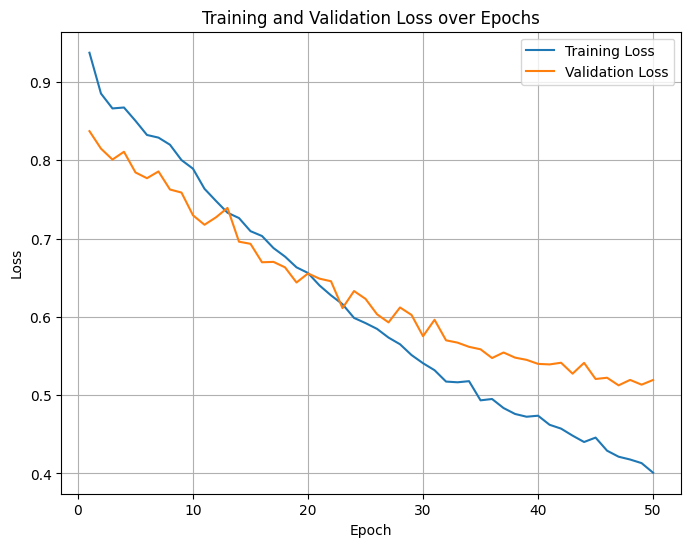

In [40]:
# Get the training and validation loss values from the history
train_loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

# Get the total number of epochs, considering the case when early stopping did not occur
total_epochs = len(train_loss)

# Create a plot for training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, total_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

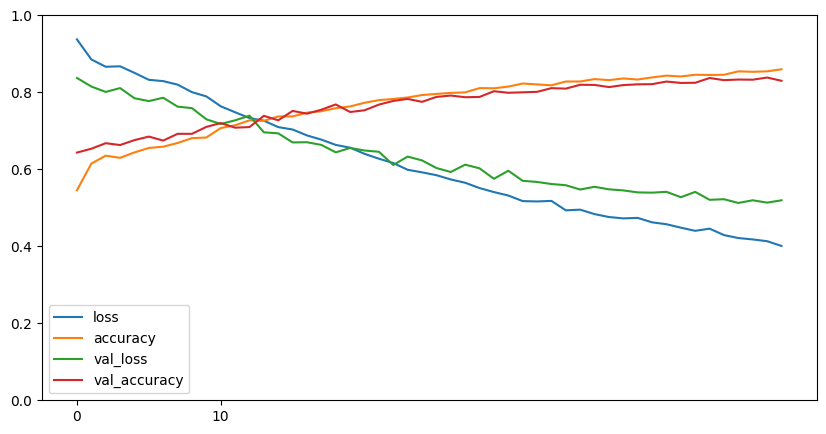

In [41]:
apd.DataFrame(history_gru.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

In [42]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/FINAL_GRU_output.h5')

In [43]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

79/79 [==============================] - 5s 59ms/step


In [44]:
import time

message = ['bệnh viện xịn']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

1/1 [==============================] - 0s 98ms/step
Message: ['bệnh viện xịn']
predicted: Negative (0.22 seconds)


________________________________________________________________________________

# LSTM

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, GRU
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_features=128
max_seq_len = val+3

# embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(vocab_size,embedding_vector_features,input_length=max_seq_len))
model.add(Dropout(0.5))

model2.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.5))

model2.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.5))

model2.add(LSTM(10))
model.add(Dropout(0.5))

model2.add(Dense(3,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1662, 128)         3328      
                                                                 
 lstm (LSTM)                 (None, 1662, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, 1662, 32)          12416     
                                                                 
 lstm_2 (LSTM)               (None, 10)                1720      
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 66,905
Trainable params: 66,905
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

model2.fit(X_train_pad, y_train,epochs=50,batch_size=32,validation_data=(X_test_pad, y_test),callbacks=[early_stop])

Epoch 1/50
313/313 [==============================] - 53s 148ms/step - loss: 0.8789 - accuracy: 0.6037 - val_loss: 0.8316 - val_accuracy: 0.6462
Epoch 2/50
313/313 [==============================] - 43s 137ms/step - loss: 0.8433 - accuracy: 0.6399 - val_loss: 0.8305 - val_accuracy: 0.6390
Epoch 3/50
313/313 [==============================] - 42s 135ms/step - loss: 0.8370 - accuracy: 0.6461 - val_loss: 0.8119 - val_accuracy: 0.6621
Epoch 4/50
313/313 [==============================] - 43s 139ms/step - loss: 0.8515 - accuracy: 0.6305 - val_loss: 0.8165 - val_accuracy: 0.6589
Epoch 5/50
313/313 [==============================] - 42s 134ms/step - loss: 0.8222 - accuracy: 0.6505 - val_loss: 0.8107 - val_accuracy: 0.6546
Epoch 6/50
313/313 [==============================] - 43s 137ms/step - loss: 0.8190 - accuracy: 0.6499 - val_loss: 0.7919 - val_accuracy: 0.6713
Epoch 7/50
313/313 [==============================] - 44s 142ms/step - loss: 0.8105 - accuracy: 0.6614 - val_loss: 0.8038 - val_ac

In [ ]:
model2.save('/content/gdrive/MyDrive/Colab Notebooks/FINAL_LSTM_output.h5')

In [ ]:
predictions = model2.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
import time

message = ['Bệnh viện như cặc']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model2.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

_______________________________________________________________________________

# Bidirectional LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, GRU
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_features=128
max_seq_len = val+3

# embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(vocab_size,embedding_vector_features,input_length=max_seq_len))
model.add(Dropout(0.5))

model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.5))

model3.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Dropout(0.5))

model3.add(Bidirectional(LSTM(10)))
model.add(Dropout(0.5))

model3.add(Dense(3,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

model3.fit(X_train_pad, y_train,epochs=50,batch_size=32,validation_data=(X_test_pad, y_test),callbacks=[early_stop])

In [ ]:
model3.save('/content/gdrive/MyDrive/Colab Notebooks/FINAL_BI_LSTM_output.h5')

In [ ]:
predictions = model3.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
import time

message = ['Bệnh viện chán']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model3.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

_______________________________________________________________________________

# Bidirectional GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, GRU
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_features=128
max_seq_len = val+3

# embedding_vector_features=40
model4=Sequential()
model4.add(Embedding(vocab_size,embedding_vector_features,input_length=max_seq_len))
model.add(Dropout(0.5))

model4.add(Bidirectional(GRU(64,return_sequences=True)))
model.add(Dropout(0.5))

model4.add(Bidirectional(GRU(32,return_sequences=True)))
model.add(Dropout(0.5))

model4.add(Bidirectional(GRU(10)))
model.add(Dropout(0.5))

model4.add(Dense(3,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model4.summary())

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

model4.fit(X_train_pad, y_train,epochs=50,batch_size=32,validation_data=(X_test_pad, y_test),callbacks=[early_stop])

In [ ]:
model4.save('/content/gdrive/MyDrive/Colab Notebooks/FINAL_BI_GRU_output.h5')

In [ ]:
predictions = model4.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [ ]:
import time

message = ['bệnh viện tốt']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model4.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))